In [1]:
# Importimg the necessary libraries for data importing and maathematical operations
import pandas as pd
import numpy as np

In [2]:
# Importing both the test and train dataset
train_df = pd.read_csv('E:IMT Studies/Dataset/Mid term ML/train_ctrUa4K.csv')
test_df = pd.read_csv('E:IMT Studies/Dataset/Mid term ML/test_lAUu6dG.csv')

In [3]:
# finding the shape of train and test data set

In [4]:
train_df.shape

(614, 13)

In [5]:
test_df.shape

(367, 12)

In [6]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# finding additional Information on the datasets given

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
# From the above we can see that there are some null values present in the dataset total null value count per column is stated below.

In [11]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
#Filling the missing values in categorical columns
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])
test_df['Gender'] = test_df['Gender'].fillna(test_df['Gender'].mode()[0])

In [14]:
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])

In [15]:
test_df['Self_Employed'] = test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])

In [16]:
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])

In [17]:
test_df['Married'] = test_df['Married'].fillna(test_df['Married'].mode()[0])

In [18]:
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])

In [19]:
test_df['Dependents'] = test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])

In [20]:
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0])

In [21]:
test_df['Credit_History'] = test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [22]:
# filling the missing values in the continous column using KNN imputer

In [23]:
from sklearn.impute import KNNImputer

In [24]:
imputer = KNNImputer()

In [25]:
train_df['LoanAmount'] = imputer.fit_transform(train_df['LoanAmount'].values.reshape(-1,1))[:,0]

In [26]:
test_df['LoanAmount'] = imputer.fit_transform(test_df['LoanAmount'].values.reshape(-1,1))[:,0]

In [27]:
train_df['Loan_Amount_Term'] = imputer.fit_transform(train_df['Loan_Amount_Term'].values.reshape(-1,1))[:,0]

In [28]:
test_df['Loan_Amount_Term'] = imputer.fit_transform(test_df['Loan_Amount_Term'].values.reshape(-1,1))[:,0]

In [29]:
# checking if the null values have been handled with
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
train_df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [32]:
# Cross Tabluation of gender along with loan status
pd.crosstab(train_df.Gender, train_df.Loan_Status, margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


In [33]:
train_df1 = train_df.drop(['Loan_ID','Loan_Status'],axis=1)

<AxesSubplot:>

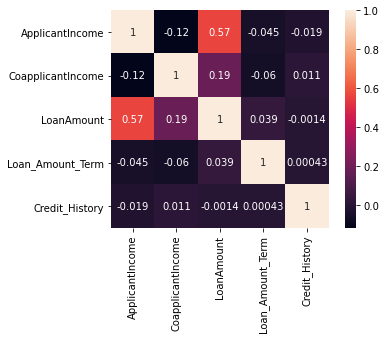

In [34]:
# Viewing Correlation in the dataset.
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data=train_df1.corr(),annot=True,square=True)

In [35]:
# Extract all categorical cols 
categorical_cols = train_df1.select_dtypes('object').columns.tolist()
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [36]:
# Extract all numeric cols
numeric_cols = train_df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [37]:
# Encoding Categorical columns
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder().fit(train_df1[categorical_cols])

In [38]:
# Generate column names for each category

encoded_cols = list(ohe.get_feature_names(categorical_cols))
print('encoded columns are:'+str(encoded_cols))
print()
print('categorical columns are:'+str(categorical_cols))
print()
print('These are the categories which we are going to encode and then add it to our data'+str(ohe.categories_))

encoded columns are:['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

categorical columns are:['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

These are the categories which we are going to encode and then add it to our data[array(['Female', 'Male'], dtype=object), array(['No', 'Yes'], dtype=object), array(['0', '1', '2', '3+'], dtype=object), array(['Graduate', 'Not Graduate'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Rural', 'Semiurban', 'Urban'], dtype=object)]


In [39]:
# Transform and add new one-hot category columns

train_df1[encoded_cols] = ohe.transform(train_df1[categorical_cols]).toarray()
train_df2 = train_df1[encoded_cols+numeric_cols]

In [40]:
train_df2.shape

(614, 20)

In [41]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            614 non-null    float64
 1   Gender_Male              614 non-null    float64
 2   Married_No               614 non-null    float64
 3   Married_Yes              614 non-null    float64
 4   Dependents_0             614 non-null    float64
 5   Dependents_1             614 non-null    float64
 6   Dependents_2             614 non-null    float64
 7   Dependents_3+            614 non-null    float64
 8   Education_Graduate       614 non-null    float64
 9   Education_Not Graduate   614 non-null    float64
 10  Self_Employed_No         614 non-null    float64
 11  Self_Employed_Yes        614 non-null    float64
 12  Property_Area_Rural      614 non-null    float64
 13  Property_Area_Semiurban  614 non-null    float64
 14  Property_Area_Urban      6

In [42]:
# creating X and Y variable for prediction
x = train_df2
y = train_df['Loan_Status']

In [43]:
x.shape, y.shape

((614, 20), (614,))

In [44]:
# Creating the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
# Spliting the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [46]:
# creating object for the logistic regresssion
logmodel = LogisticRegression()

In [47]:
# Fitting the Log model
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)

E:\IMT Studies\python anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,pred_l))

              precision    recall  f1-score   support

           N       0.76      0.41      0.54        63
           Y       0.75      0.93      0.84       122

    accuracy                           0.76       185
   macro avg       0.76      0.67      0.69       185
weighted avg       0.76      0.76      0.73       185



In [50]:
# from the coorelation analysis we can see that two independent variables are highly coorelated (Multicollinearity) hence we will build the model removing one of the variables and asses the model again

In [51]:
#Removing the loan amount column
train_df3 = train_df2.drop(['LoanAmount'],axis=1)

In [52]:
train_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            614 non-null    float64
 1   Gender_Male              614 non-null    float64
 2   Married_No               614 non-null    float64
 3   Married_Yes              614 non-null    float64
 4   Dependents_0             614 non-null    float64
 5   Dependents_1             614 non-null    float64
 6   Dependents_2             614 non-null    float64
 7   Dependents_3+            614 non-null    float64
 8   Education_Graduate       614 non-null    float64
 9   Education_Not Graduate   614 non-null    float64
 10  Self_Employed_No         614 non-null    float64
 11  Self_Employed_Yes        614 non-null    float64
 12  Property_Area_Rural      614 non-null    float64
 13  Property_Area_Semiurban  614 non-null    float64
 14  Property_Area_Urban      6

In [53]:
# creating X and Y variable for prediction
x = train_df3
y = train_df['Loan_Status']

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [55]:
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)

E:\IMT Studies\python anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
print(classification_report(y_test,pred_l))

              precision    recall  f1-score   support

           N       0.82      0.43      0.56        63
           Y       0.76      0.95      0.85       122

    accuracy                           0.77       185
   macro avg       0.79      0.69      0.70       185
weighted avg       0.78      0.77      0.75       185



In [57]:
# As we can see after removing multicollinearity there was a increase in accuracy and f1 score

<AxesSubplot:>

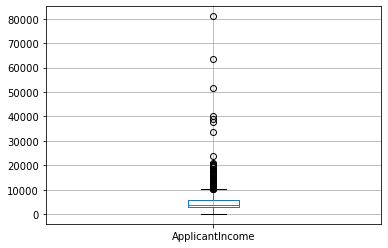

In [58]:
# Checking for Outliers
train_df.boxplot(column = ['ApplicantIncome'])

<AxesSubplot:>

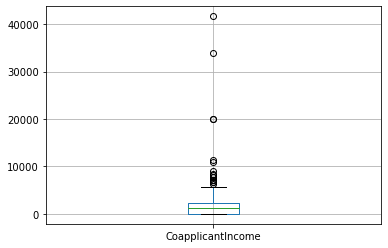

In [59]:
train_df.boxplot(column = ['CoapplicantIncome'])

In [60]:
# as we can see here outliers are present in the data

In [68]:
# removing the Outliers and creating the model again
Q1 = train_df['ApplicantIncome'].quantile(0.25)
Q3 = train_df['ApplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train_df = train_df[~((train_df['ApplicantIncome'] < (Q1 - 3 * IQR)) | (train_df['ApplicantIncome'] > (Q3 + 3 * IQR)))]

In [69]:
Q1 = train_df['CoapplicantIncome'].quantile(0.25)
Q3 = train_df['CoapplicantIncome'].quantile(0.75)

IQR = Q3 - Q1

train_df = train_df[~((train_df['CoapplicantIncome'] < (Q1 - 3 * IQR)) | (train_df['CoapplicantIncome'] > (Q3 + 3 * IQR)))]

In [71]:
train_df.shape

(574, 13)

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            574 non-null    object 
 1   Gender             574 non-null    object 
 2   Married            574 non-null    object 
 3   Dependents         574 non-null    object 
 4   Education          574 non-null    object 
 5   Self_Employed      574 non-null    object 
 6   ApplicantIncome    574 non-null    int64  
 7   CoapplicantIncome  574 non-null    float64
 8   LoanAmount         574 non-null    float64
 9   Loan_Amount_Term   574 non-null    float64
 10  Credit_History     574 non-null    float64
 11  Property_Area      574 non-null    object 
 12  Loan_Status        574 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.8+ KB


In [75]:
train_df4 = pd.get_dummies(train_df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']])

In [77]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Gender_Female            574 non-null    uint8
 1   Gender_Male              574 non-null    uint8
 2   Married_No               574 non-null    uint8
 3   Married_Yes              574 non-null    uint8
 4   Dependents_0             574 non-null    uint8
 5   Dependents_1             574 non-null    uint8
 6   Dependents_2             574 non-null    uint8
 7   Dependents_3+            574 non-null    uint8
 8   Education_Graduate       574 non-null    uint8
 9   Education_Not Graduate   574 non-null    uint8
 10  Self_Employed_No         574 non-null    uint8
 11  Self_Employed_Yes        574 non-null    uint8
 12  Property_Area_Rural      574 non-null    uint8
 13  Property_Area_Semiurban  574 non-null    uint8
 14  Property_Area_Urban      574 non-null    uint8
dtypes: uin

In [80]:
extracted_col = train_df[['Loan_Amount_Term','Credit_History','ApplicantIncome','CoapplicantIncome']]


In [81]:
train_df4.join(extracted_col)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,360.0,1.0,5849,0.0
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,360.0,1.0,4583,1508.0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,360.0,1.0,3000,0.0
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,360.0,1.0,2583,2358.0
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,360.0,1.0,6000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,360.0,1.0,2900,0.0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,180.0,1.0,4106,0.0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,360.0,1.0,8072,240.0
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,360.0,1.0,7583,0.0


In [82]:
x = train_df4
y = train_df['Loan_Status']

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [87]:
logmodel.fit(x_train,y_train)
pred_l=logmodel.predict(x_test)

In [88]:
print(classification_report(y_test,pred_l))

              precision    recall  f1-score   support

           N       0.14      0.03      0.04        38
           Y       0.66      0.92      0.77        77

    accuracy                           0.63       115
   macro avg       0.40      0.47      0.41       115
weighted avg       0.49      0.63      0.53       115



In [89]:
# The accuracy score and the f1 score have reduced by removing the outliers hence here removing the outliers does not give better results